In [0]:
#importing dependencies
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=input_data.read_data_sets("MNIST data",one_hot=True) #loading data

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST data/t10k-images-idx3-ubyte.gz
Extracting MNIST data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def weights(shape):
    init=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init)
def biases(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)
# HELPER FUNCTIONS FOR WEIGHTS AND BIASES


In [0]:
def conv2D(X,W,b):
    convlvd=tf.nn.conv2d(X,W,strides=[1,1,1,1],padding='SAME')
    return tf.nn.relu(convlvd+b)
#HELPER FUNCTION FOR CONVOLUTION OPERATION

In [0]:
def maxpool2D(X):
    return tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
#HELPER FUNCTION FOR MAXPOOLING OPERATION

In [0]:
tf.reset_default_graph()
x=tf.placeholder(tf.float32,shape=[None,784])
y_=tf.placeholder(tf.float32,shape=[None,10])
x_images=tf.reshape(x,shape=(-1,28,28,1))#MAKING PLACEHOLDER FOR INPUTTIN DATA

In [0]:
def flatten(X):
    X_re=tf.reshape(X,shape=(-1,X.shape[1]*X.shape[2]*X.shape[3]))
    return X_re
#FOR FLATTENING THE FINAL LAYER TO FEED IN FULLY CONNECTED LAYER

In [0]:
W_conv1=weights((5,5,1,16))
b_conv1=biases([16])
#DEFINING WEIGHTS AND BIASES FOR FIRST CONV LAYER

In [0]:
h_conv1=conv2D(x_images,W_conv1,b_conv1)
h_convmax1=maxpool2D(h_conv1)#APPLYING CONVOLUTION AND MAXPOOLING OPERATIONS FOR LAYER 1

In [0]:
W_conv2=weights((5,5,16,32))
b_conv2=biases([32])#DEFINING WEIGHTS AND BIASES FOR SECOND CONV LAYER
h_conv2=conv2D(h_convmax1,W_conv2,b_conv2)
h_pool2=maxpool2D(h_conv2)#APPLYING CONVOLUTION AND MAXPOOLING OPERATIONS FOR LAYER 2

In [11]:
h_pool2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(32)])

In [12]:
W_conv3=weights((5,5,32,64))
b_conv3=biases([64])#DEFINING WEIGHTS AND BIASES FOR THIRD CONV LAYER
h_conv3=conv2D(h_pool2,W_conv3,b_conv3)
h_pool3=maxpool2D(h_conv3)#APPLYING CONVOLUTION AND MAXPOOLING OPERATIONS FOR LAYER 3
h_pool3.get_shape()

TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(64)])

In [0]:
w_fc1=weights([4*4*64,1200])
b_fc1=weights([1200])#DEFINING WEIGHTS AND BIASES FOR FIRST FC LAYER
h_pool3_flat=flatten(h_pool3)#FLATTENING THE LAST LAYER
h_fc1=tf.nn.relu(tf.matmul(h_pool3_flat,w_fc1)+b_fc1)#PASSING THE FLAT LAYER INTO FC1

In [0]:
w_fc2=weights([1200,10])
b_fc2=weights([10])#DEFINING WEIGHTS AND BIASES FOR SECOND FC LAYER
keep_prob=tf.placeholder(tf.float32)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)
y=tf.matmul(h_fc1_drop,w_fc2)+b_fc2#PASSING THE OUTPUT OF FC1 LAYER INTO FC2

In [0]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_,logits=y))#CALCULATING THE LOSS

In [0]:
alpha=tf.constant(0.01)
train=tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cross_entropy)#DEFINING THE OPTIMIZER


In [0]:
correct_predictions=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_predictions,tf.float32))#CALCULATING THE ACCURACY

In [18]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train, feed_dict={x:batch[0],y_:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],y_:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))
        
#TRAINING THE NETWORK

step 100, training accuracy 0.88
step 200, training accuracy 0.92
step 300, training accuracy 0.94
step 400, training accuracy 0.98
step 500, training accuracy 1
step 600, training accuracy 0.96
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 0.96
step 1000, training accuracy 0.94


(-0.5, 27.5, 27.5, -0.5)

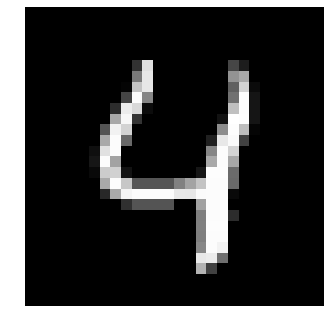

In [19]:
import math
#FUNCTION FOR PLOTTING OUTPUTS
def plotnn(units):
    filters=units.shape[3]#NO OF FILTERS IN THE LAYER
    plt.figure(1,(20,20))
    n_columns=10
    n_rows=math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows,n_columns,i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        plt.axis('off')
#FUNCTION FOR GETTIN THE LAYER ACTIVATIONS FOR CERTAIN INPUT GIVEN
def getActivations(layer,stimuli):
    units=sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotnn(units)
img=mnist.test.images[4]
plt.imshow(np.reshape(img,[28,28]),interpolation='nearest',cmap='gray')
plt.axis('off')

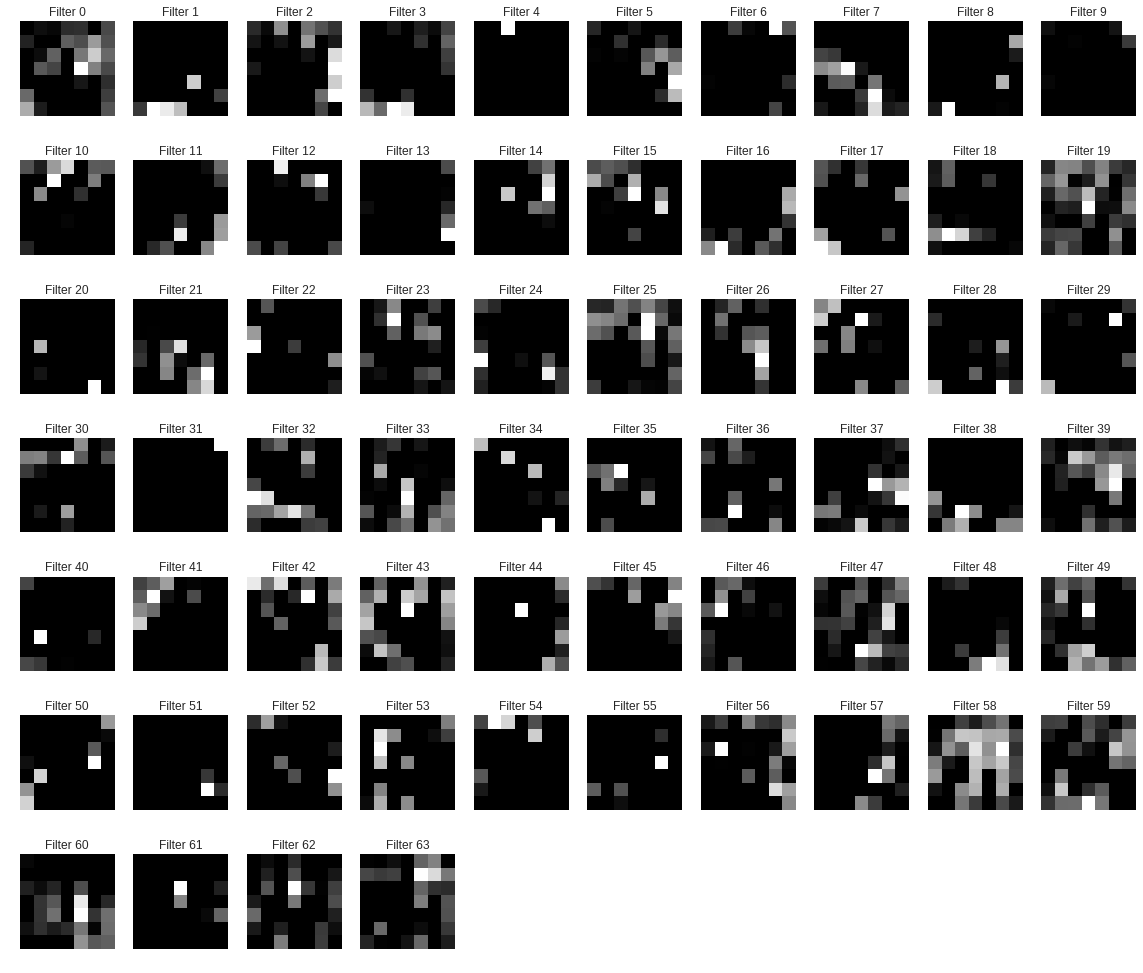

In [20]:
getActivations(h_conv3,img)

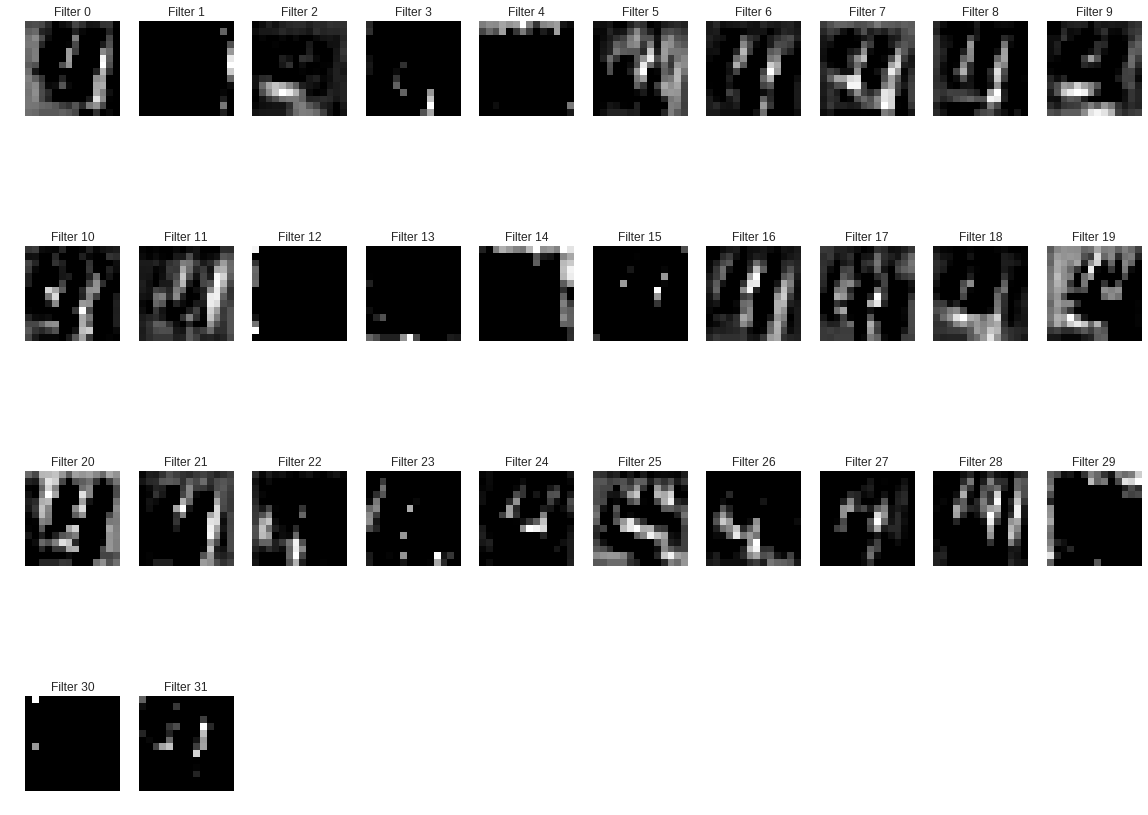

In [21]:
getActivations(h_conv2,img)

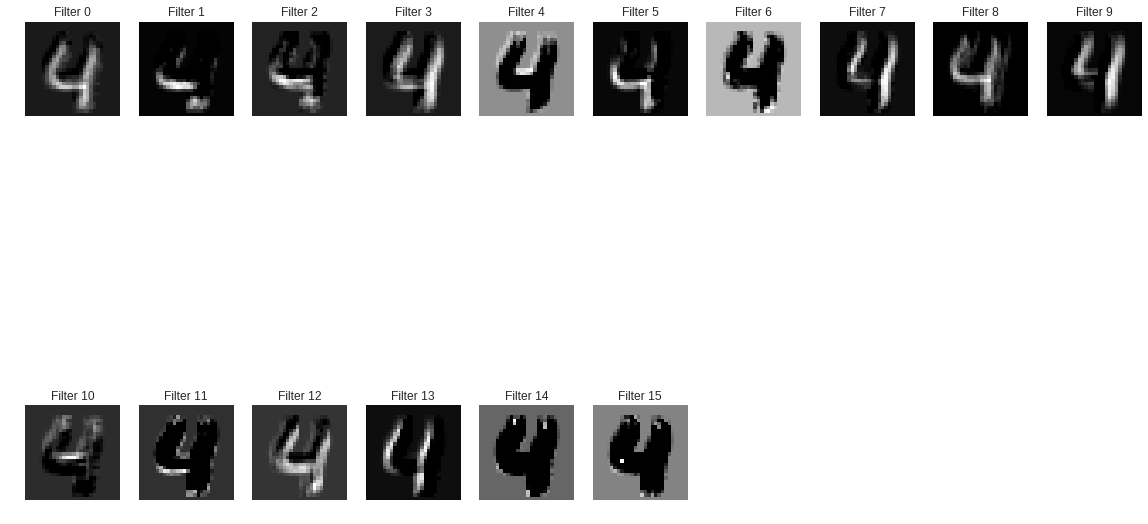

In [22]:
getActivations(h_conv1,img)